In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
print('setup complete')

setup complete


In [2]:
df = pd.read_csv('SalesForCourse_quizz_table.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [4]:
df[df['Date'].isnull()]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


In [5]:
df = df.dropna(subset=['Date'])

In [6]:
df = df.drop('Column1',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34866 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34866 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.3+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

In [10]:
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany'],
      dtype=object)

In [11]:
df['State'].unique()

array(['Washington', 'California', 'Oregon', 'Essonne', 'Yveline',
       'England', 'Hessen', 'Hamburg', 'Seine Saint Denis', 'Saarland',
       'Nordrhein-Westfalen', 'Bayern', 'Seine (Paris)', 'Pas de Calais',
       'Moselle', 'Hauts de Seine', 'Nord', 'Seine et Marne', 'Loiret',
       'Charente-Maritime', 'Loir et Cher', 'Brandenburg', 'Alabama',
       "Val d'Oise", 'Val de Marne', 'Minnesota', 'Wyoming', 'Ohio',
       'Garonne (Haute)', 'Kentucky', 'Texas', 'Missouri', 'Somme',
       'New York', 'Florida', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Mississippi', 'Montana',
       'Arizona', 'Massachusetts', 'Utah'], dtype=object)

In [12]:
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [13]:
df['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

In [14]:
df['Margin']=df['Revenue'] - df['Cost']

In [15]:
df['Unit_Margin'] = df['Unit Price'] - df['Unit Cost']

In [16]:
df.groupby('Year')['Revenue'].sum()

Year
2015.0     9947771.0
2016.0    12396805.0
Name: Revenue, dtype: float64

<AxesSubplot: title={'center': 'Revenue by year'}, ylabel='Year'>

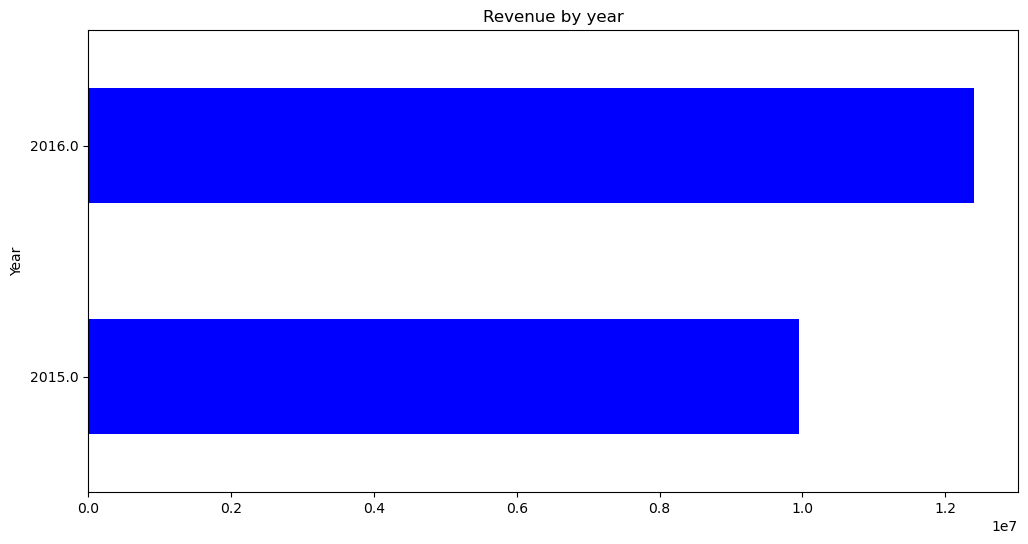

In [20]:
plt.figure(figsize=(12,6))
df.groupby('Year')['Revenue'].sum().plot.barh(color='blue',title='Revenue by year')

<AxesSubplot: title={'center': 'Revenue by year'}, ylabel='Year_Month'>

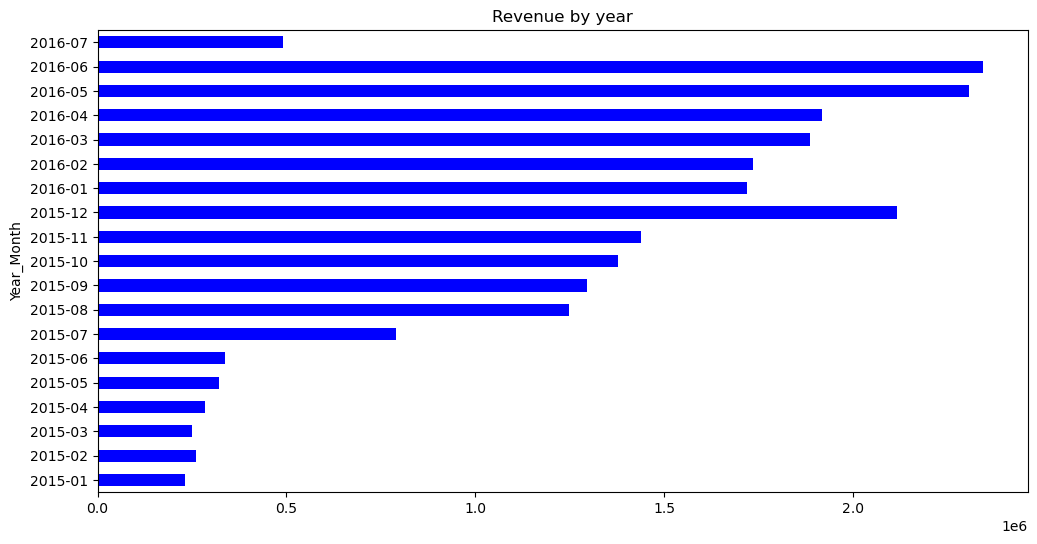

In [24]:
plt.figure(figsize=(12,6))
df.groupby('Year_Month')['Revenue'].sum().plot.barh(color='blue',title='Revenue by year')

<AxesSubplot: title={'center': 'Revenue by year'}, xlabel='Year_Month'>

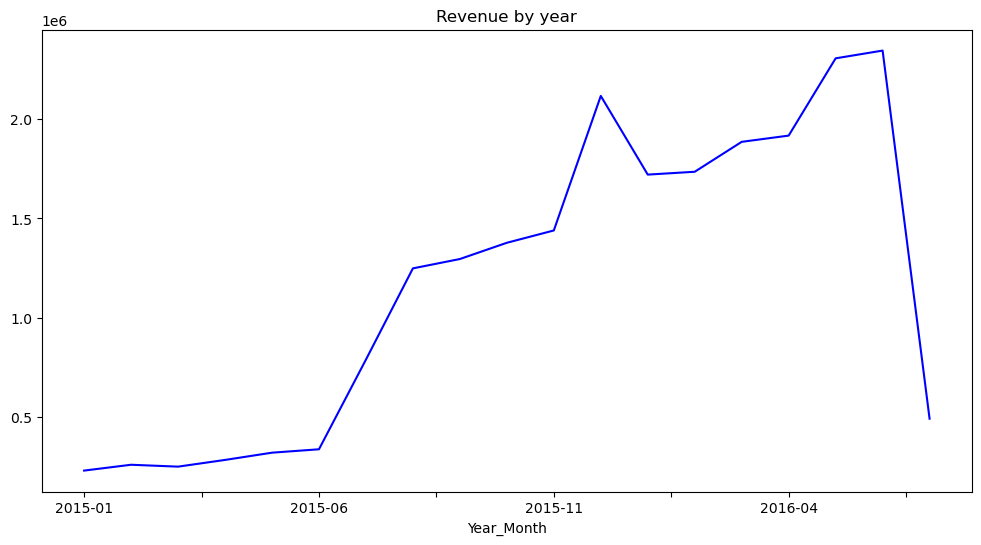

In [23]:
plt.figure(figsize=(12,6))
df.groupby('Year_Month')['Revenue'].sum().plot(color='blue',title='Revenue by year')

In [26]:
df.groupby('Year')['Margin'].sum()

Year
2015.0     288620.0
2016.0    1972982.0
Name: Margin, dtype: float64

<AxesSubplot: title={'center': 'Margin by year'}, ylabel='Year'>

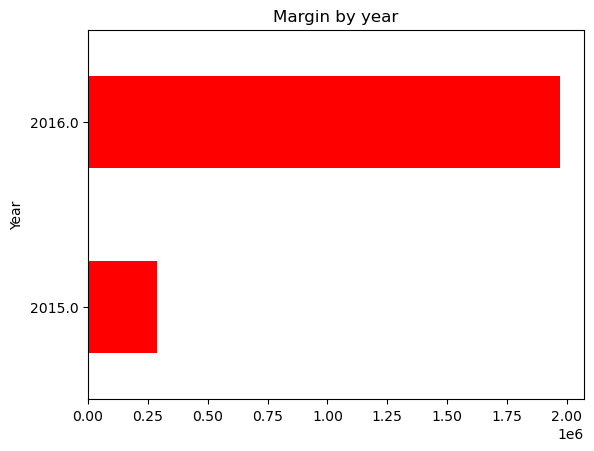

In [27]:
df.groupby('Year')['Margin'].sum().plot.barh(color='red',title='Margin by year')

<AxesSubplot: title={'center': 'Margin by year'}, xlabel='Year_Month'>

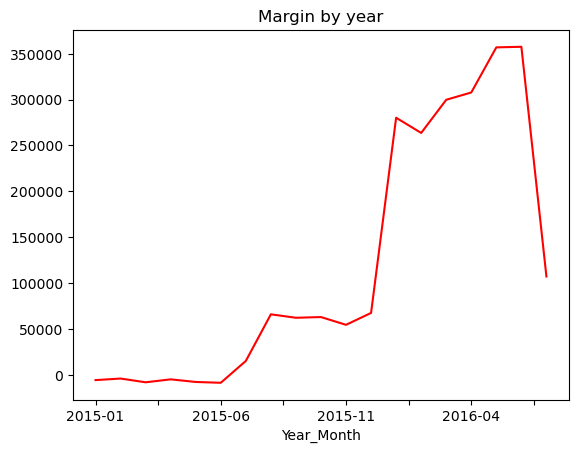

In [28]:
df.groupby('Year_Month')['Margin'].sum().plot(color='red',title='Margin by year')

In [33]:
k=df.groupby('Year')['Margin'].sum()/df.groupby('Year')['Revenue'].sum()*100

<AxesSubplot: ylabel='Year'>

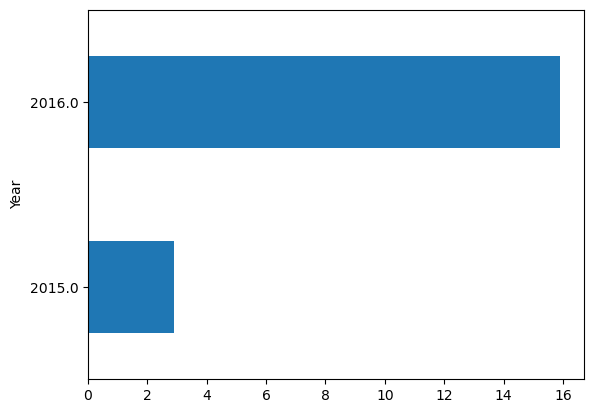

In [34]:
k.plot.barh()

In [35]:
kk=df.groupby('Year_Month')['Margin'].sum()/df.groupby('Year_Month')['Revenue'].sum()*100

<AxesSubplot: ylabel='Year_Month'>

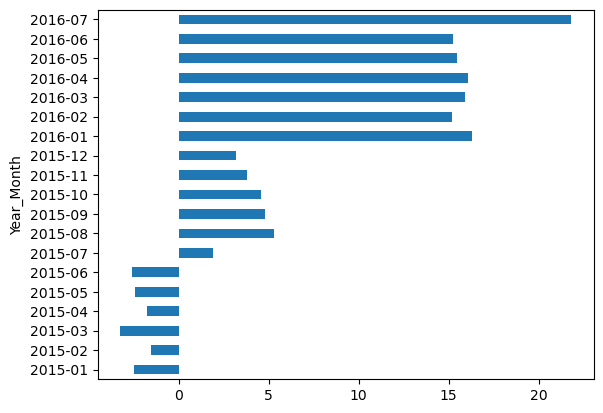

In [37]:
kk.plot.barh()

<AxesSubplot: xlabel='Year_Month'>

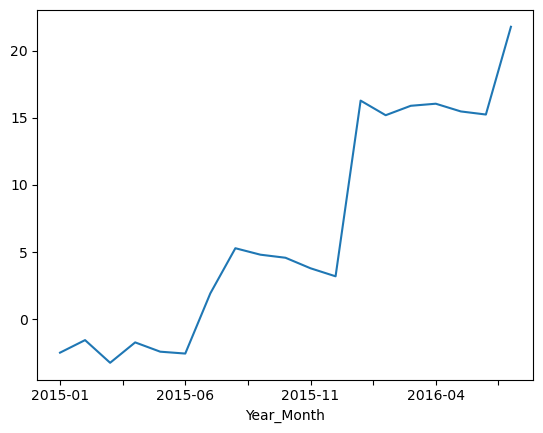

In [38]:
kk.plot()

In [39]:
pp = df.groupby('Product Category')['Margin'].sum() / df.groupby('Product Category')['Revenue'].sum()*100

In [40]:
pp

Product Category
Accessories    18.580130
Bikes           2.939148
Clothing       15.861032
dtype: float64

<AxesSubplot: title={'center': 'Revenue by Product Category'}, ylabel='None'>

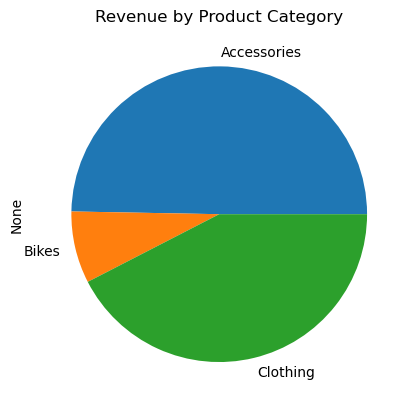

In [42]:
pp.plot.pie(title = 'Revenue by Product Category')

<AxesSubplot: ylabel='Margin'>

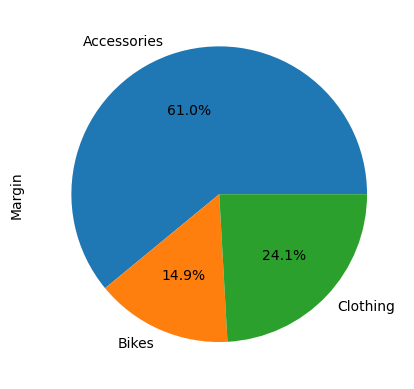

In [43]:
df.groupby('Product Category')['Margin'].sum().plot.pie(autopct="%1.1f%%")

<AxesSubplot: title={'center': 'Profitability by Product Category'}, ylabel='Product Category'>

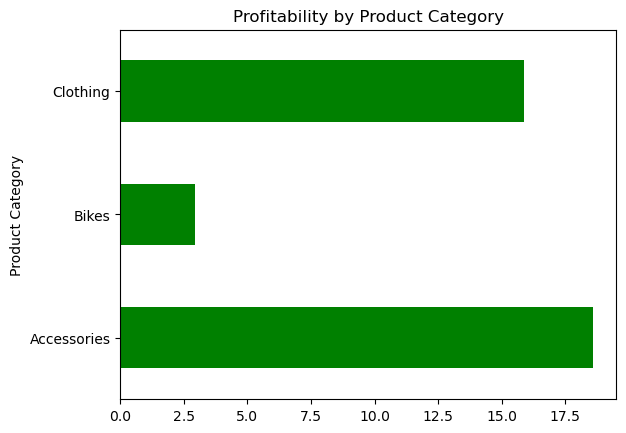

In [44]:
(df.groupby('Product Category')['Margin'].sum()/df.groupby('Product Category')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by Product Category')

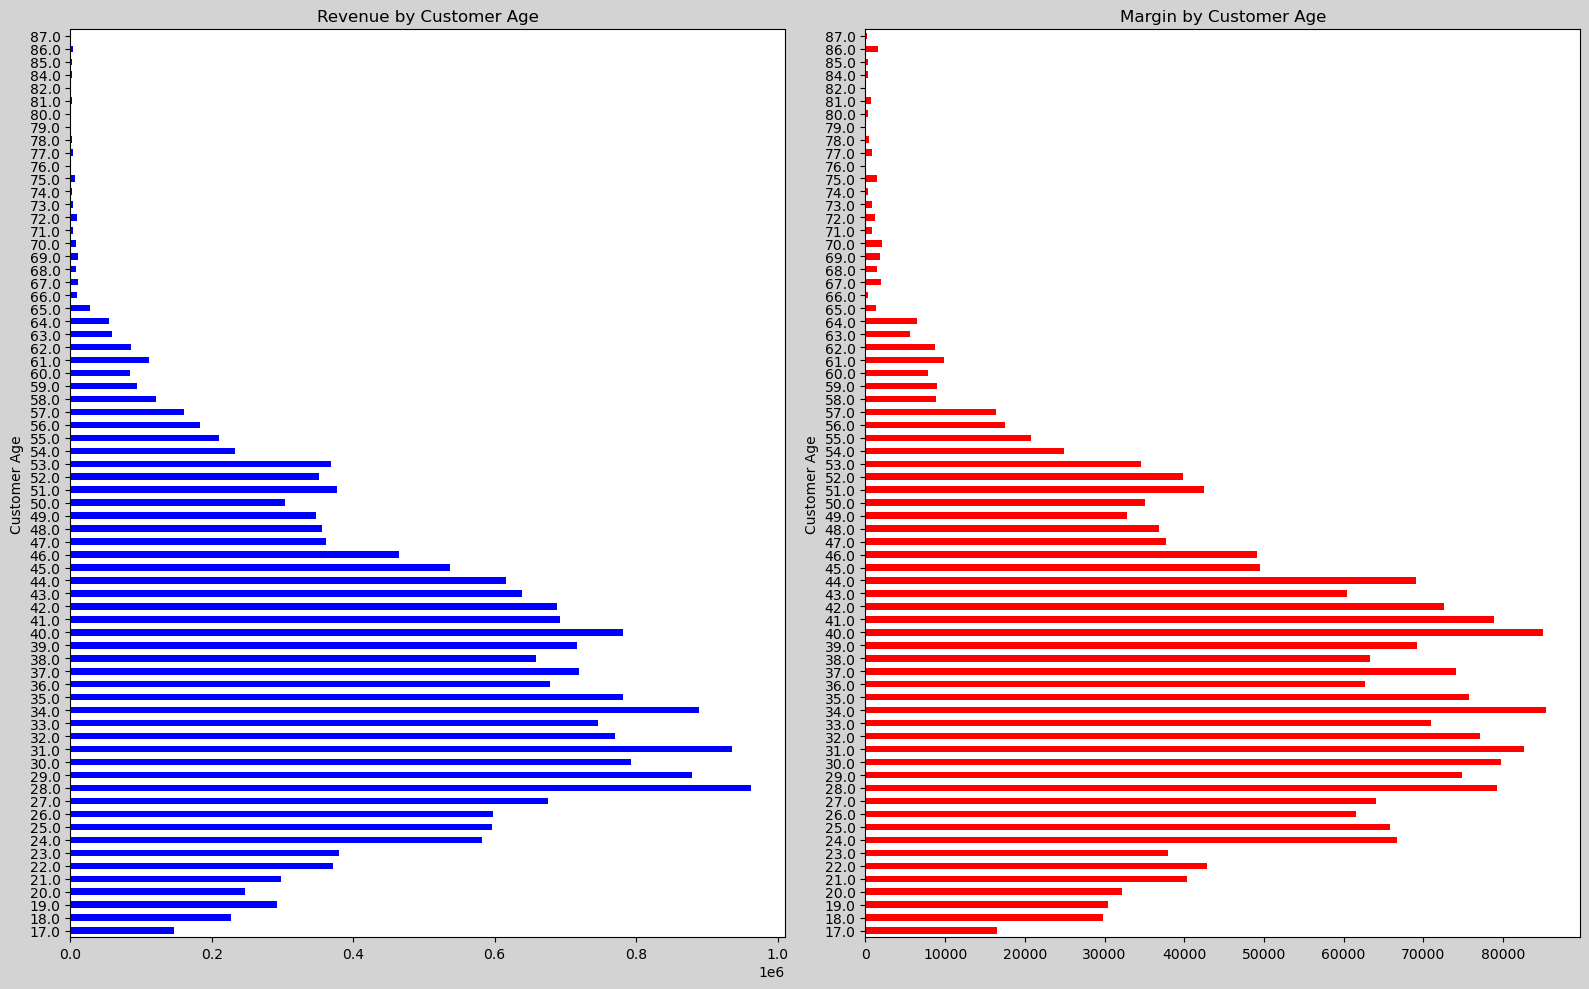

In [45]:
plt.figure(figsize = (16,10), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Revenue by Customer Age")
df.groupby('Customer Age')['Revenue'].sum().plot.barh(color='blue')
plt.subplot(1, 2, 2, title="Margin by Customer Age")
df.groupby('Customer Age')['Margin'].sum().plot.barh(color='red')
plt.tight_layout()
plt.show()

In [46]:
import math
df['generation']=df['Customer Age'].apply(lambda x:math.floor(x/10)*10)
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Year_Month,Margin,Unit_Margin,generation
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,2016-02,29.0,29.000000,20
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,2016-02,8.0,4.000000,20
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,2016-02,4.0,1.330000,20
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,2016-03,58.0,29.000000,20
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,2016-03,20.0,6.666667,20


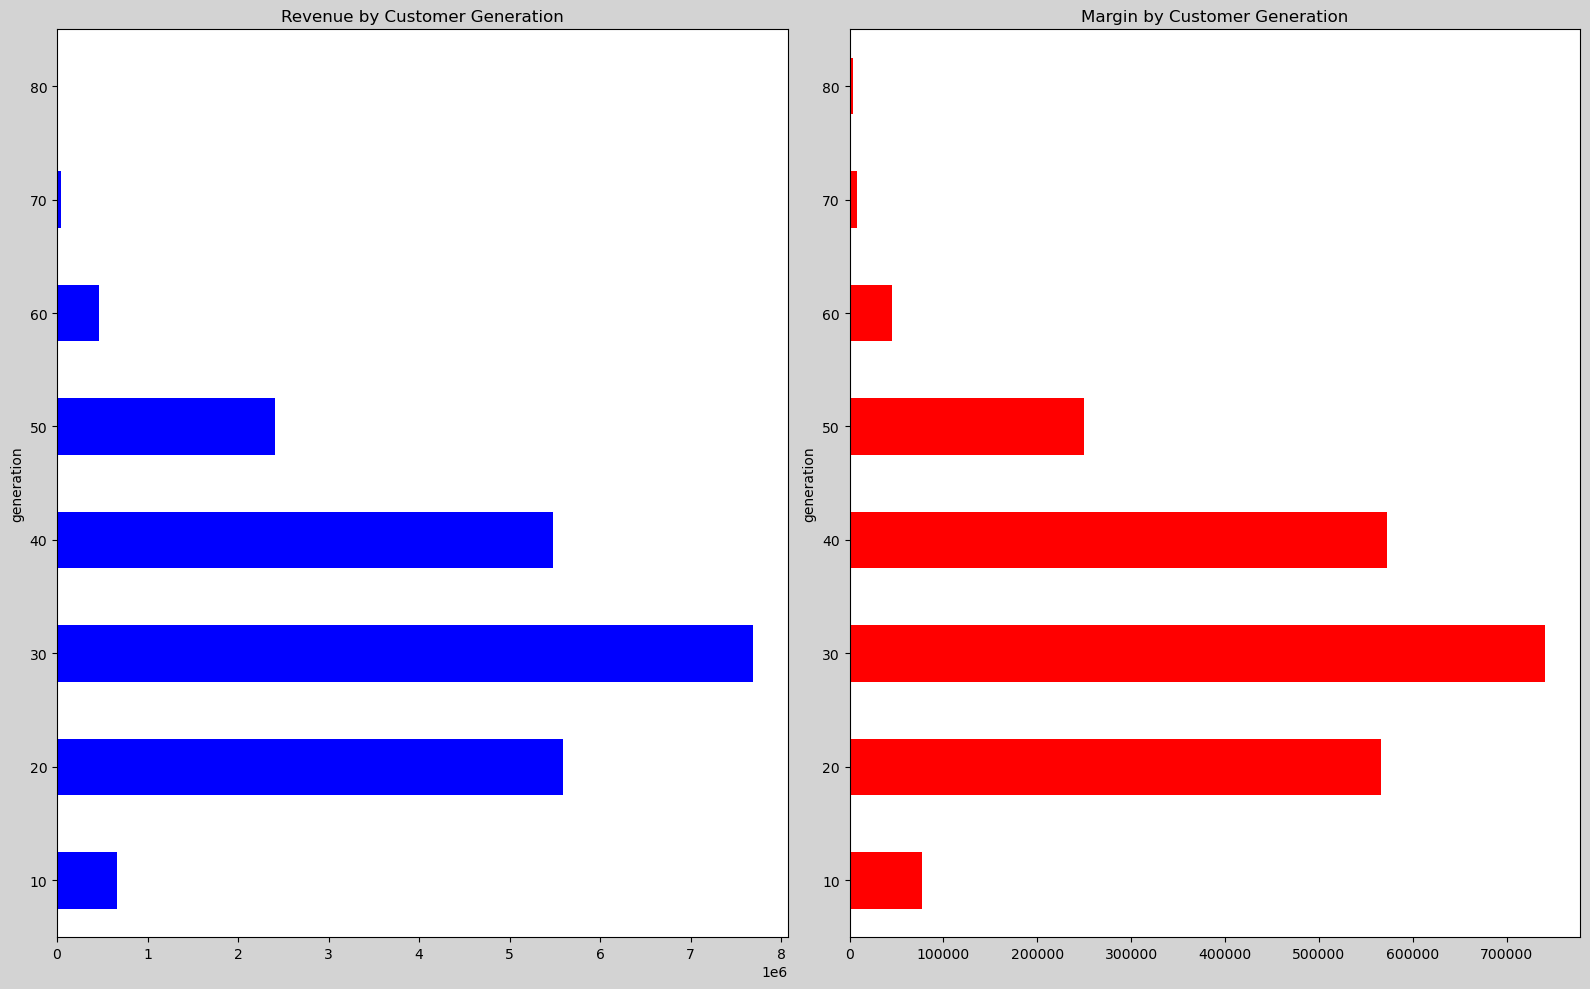

In [47]:
plt.figure(figsize = (16,10), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Revenue by Customer Generation")
df.groupby('generation')['Revenue'].sum().plot.barh(color='blue')
plt.subplot(1, 2, 2, title="Margin by Customer Generation")
df.groupby('generation')['Margin'].sum().plot.barh(color='red')
plt.tight_layout()
plt.show()

<AxesSubplot: ylabel='Revenue'>

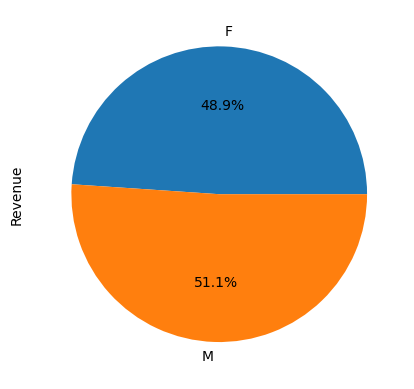

In [48]:
df.groupby('Customer Gender')['Revenue'].sum().plot.pie(autopct="%1.1f%%")

<AxesSubplot: ylabel='Margin'>

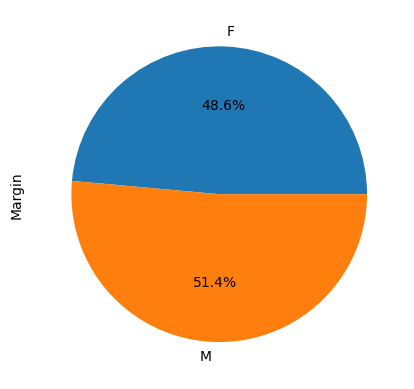

In [49]:
df.groupby('Customer Gender')['Margin'].sum().plot.pie(autopct="%1.1f%%")

<AxesSubplot: title={'center': 'Profitability by Customer Gender'}, ylabel='Customer Gender'>

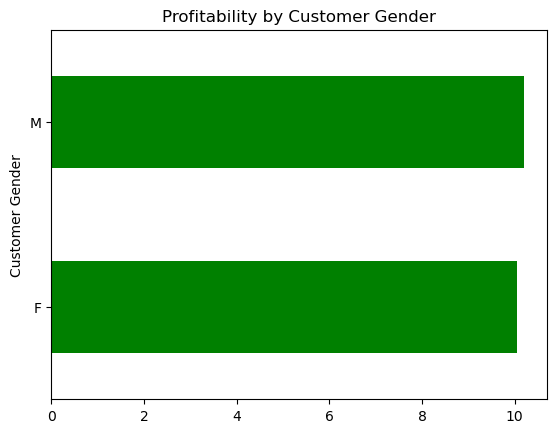

In [50]:
(df.groupby('Customer Gender')['Margin'].sum()/df.groupby('Customer Gender')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by Customer Gender')

In [52]:
cm=df.groupby('Country')['Margin'].sum() / df.groupby('Country')['Revenue'].sum()*100

<AxesSubplot: ylabel='None'>

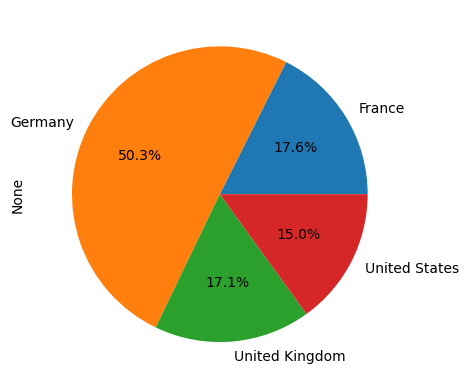

In [53]:
cm.plot.pie(autopct='%1.1f%%')

<AxesSubplot: ylabel='Margin'>

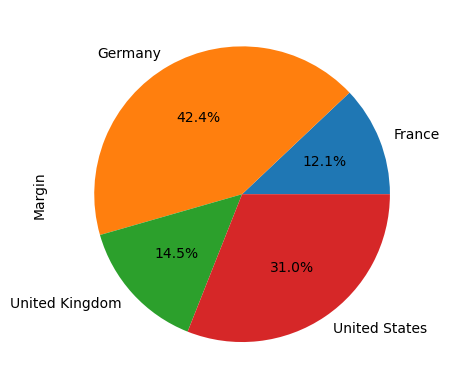

In [54]:
df.groupby('Country')['Margin'].sum().plot.pie(autopct="%1.1f%%")

<AxesSubplot: title={'center': 'Profitability by Country'}, ylabel='Country'>

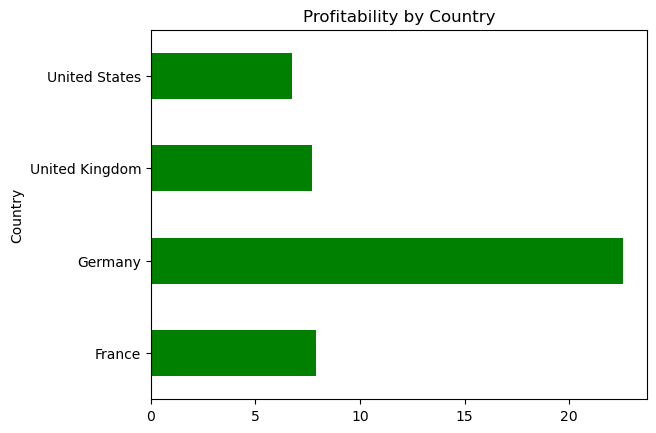

In [55]:
(df.groupby('Country')['Margin'].sum()/df.groupby('Country')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by Country')

In [56]:
Total=df.groupby('Year_Month')['Revenue'].sum()
Bikes=df[df['Product Category']=='Bikes'].groupby('Year_Month')['Revenue'].sum()
Accessories=df[df['Product Category']=='Accessories'].groupby('Year_Month')['Revenue'].sum()
Clothing=df[df['Product Category']=='Clothing'].groupby('Year_Month')['Revenue'].sum()

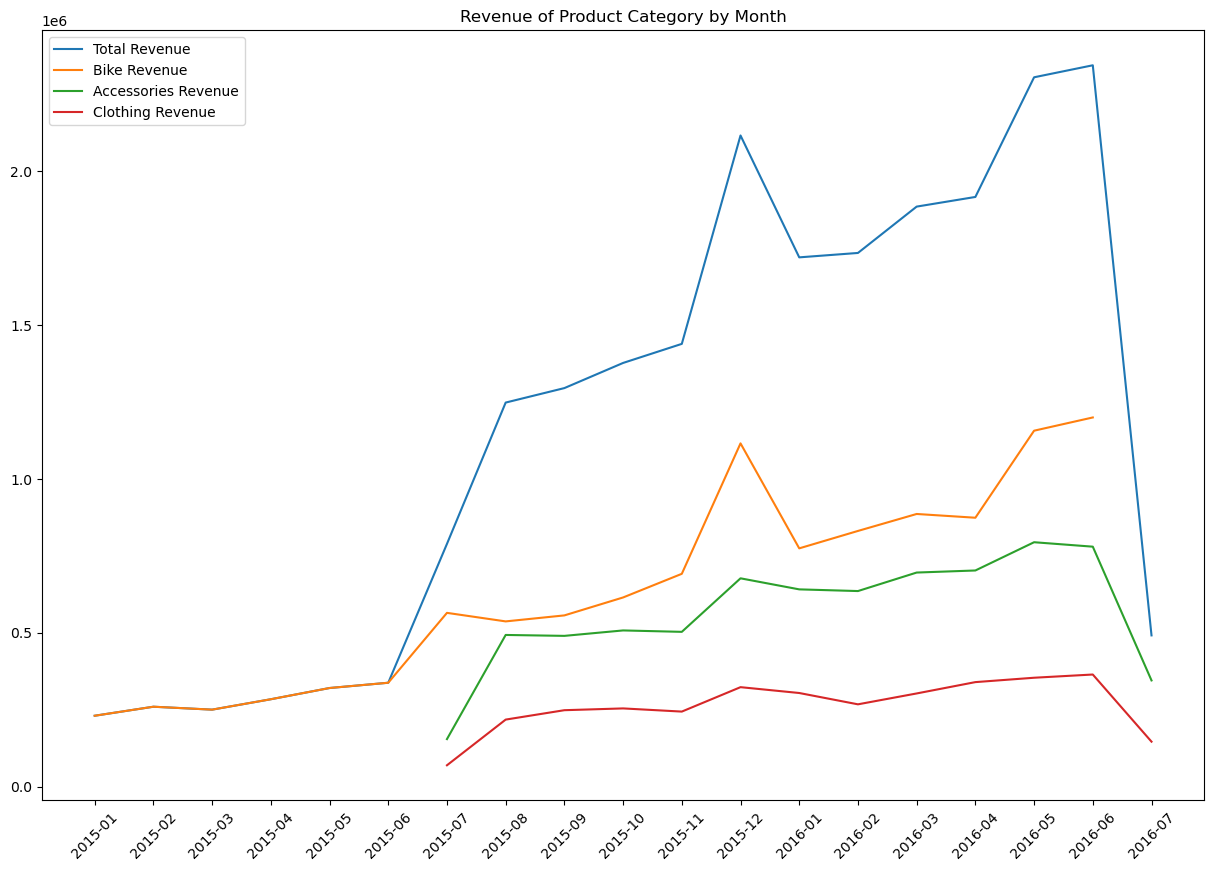

In [57]:
plt.figure(figsize=[15,10])
plt.plot(Total,label='Total Revenue')
plt.plot(Bikes,label='Bike Revenue')
plt.plot(Accessories,label='Accessories Revenue')
plt.plot(Clothing,label='Clothing Revenue')
plt.legend(loc=2)
plt.title('Revenue of Product Category by Month')
plt.xticks(rotation=45)
plt.show();


In [58]:
Total_Margin=df.groupby('Year_Month')['Margin'].sum()
Bikes_Margin=df[df['Product Category']=='Bikes'].groupby('Year_Month')['Margin'].sum()
Accessories_Margin=df[df['Product Category']=='Accessories'].groupby('Year_Month')['Margin'].sum()
Clothing_Margin=df[df['Product Category']=='Clothing'].groupby('Year_Month')['Margin'].sum()

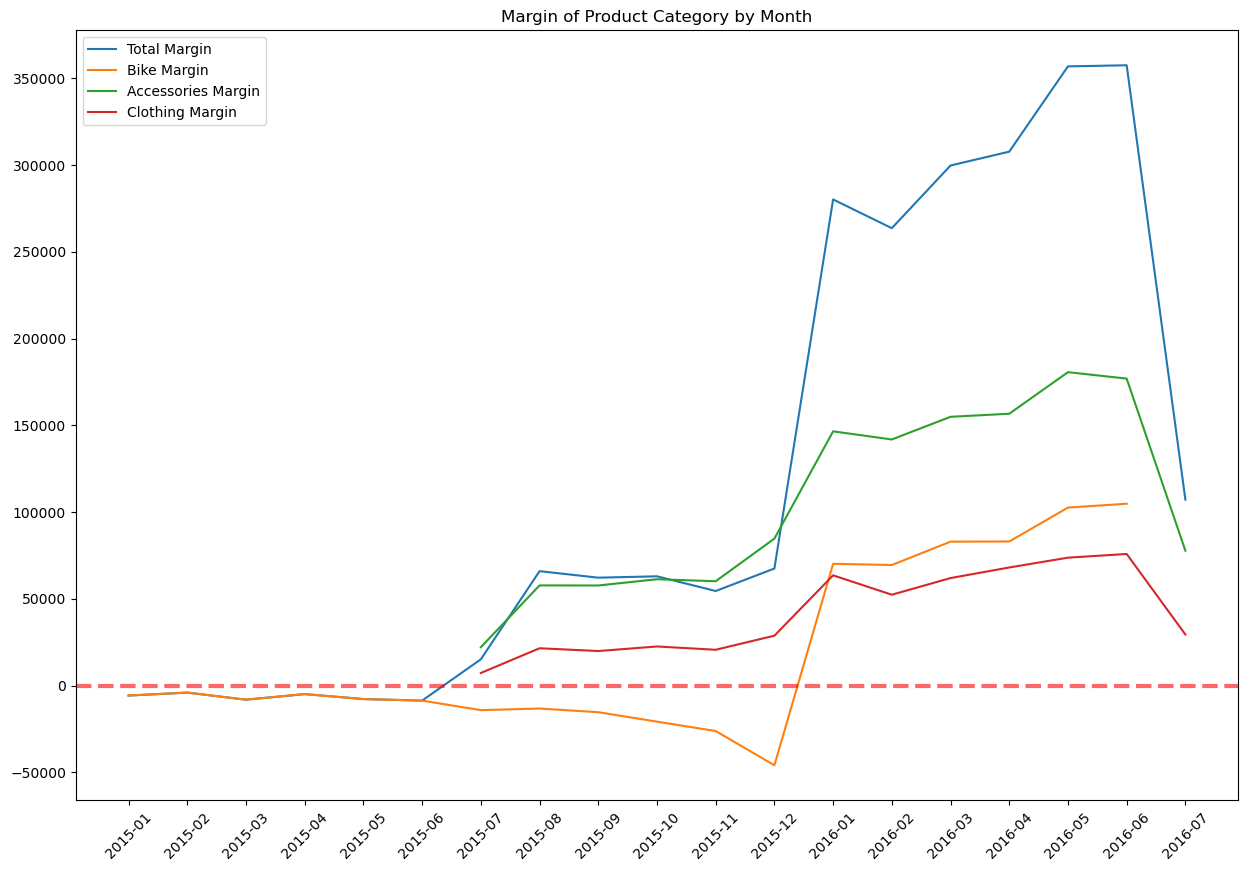

In [59]:
plt.figure(figsize=[15,10])
plt.plot(Total_Margin,label='Total Margin')
plt.plot(Bikes_Margin,label='Bike Margin')
plt.plot(Accessories_Margin,label='Accessories Margin')
plt.plot(Clothing_Margin,label='Clothing Margin')
plt.legend(loc=2)
plt.title('Margin of Product Category by Month')
plt.xticks(rotation=45)
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6)
plt.show();

In [60]:
Touring_Bikes=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Revenue'].sum()
Road_Bikes=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Revenue'].sum()
Mountain_Bikes=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Revenue'].sum()

In [65]:
df_Mountain=df[df['Sub Category']=='Mountain Bikes']
df_Mountain.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Year_Month,Margin,Unit_Margin,generation
49,49,2016-06-11,2016.0,June,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,769.0,875.0,769.0,875.0,2016-06,106.0,106.0,10
50,50,2015-08-13,2015.0,August,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,2295.0,2242.0,2295.0,2242.0,2015-08,-53.0,-53.0,10
51,51,2015-09-10,2015.0,September,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,769.0,776.0,769.0,776.0,2015-09,7.0,7.0,10
52,52,2015-10-20,2015.0,October,18.0,M,United States,California,Bikes,Mountain Bikes,2.0,1160.0,1005.0,2320.0,2010.0,2015-10,-310.0,-155.0,10
53,53,2015-12-21,2015.0,December,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,2295.0,2303.0,2295.0,2303.0,2015-12,8.0,8.0,10


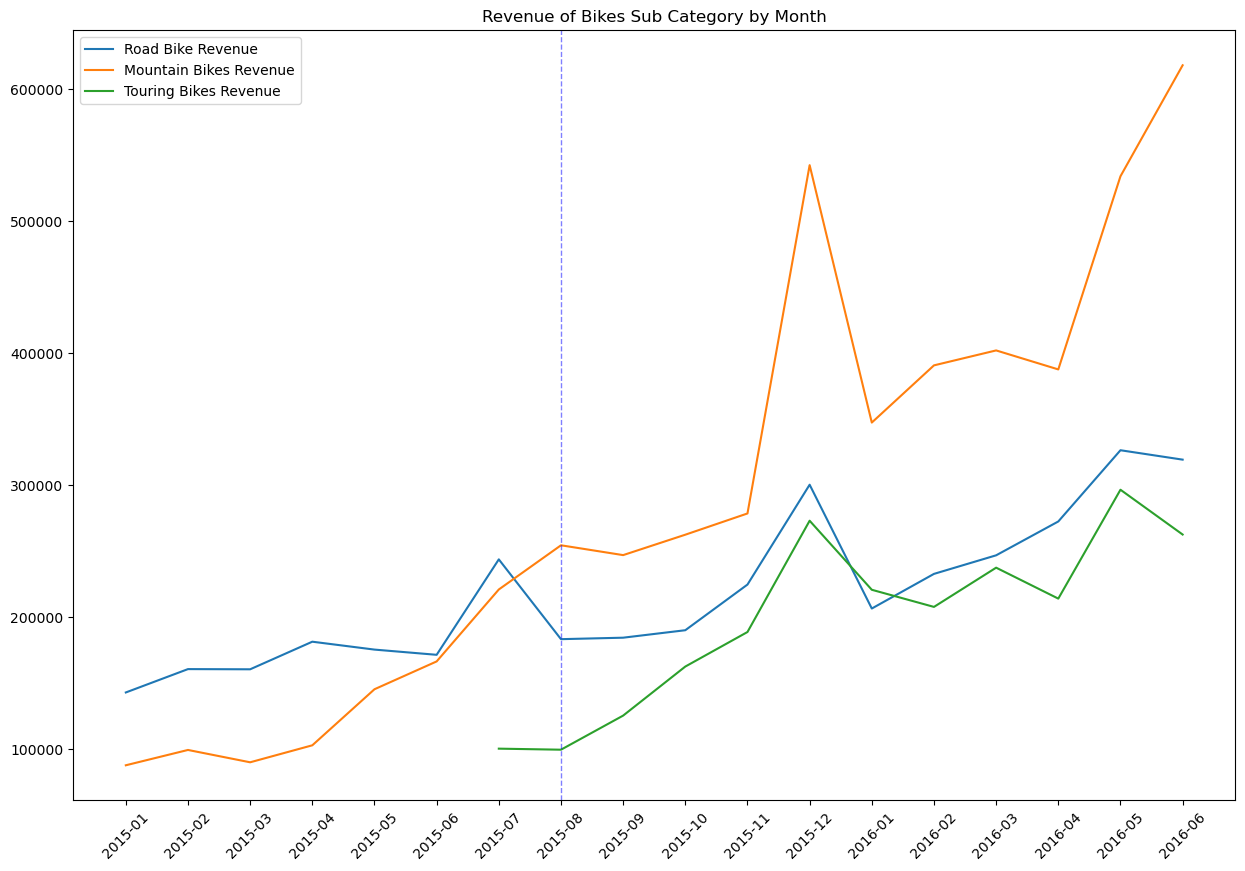

In [66]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes,label='Road Bike Revenue')
plt.plot(Mountain_Bikes,label='Mountain Bikes Revenue')
plt.plot(Touring_Bikes,label='Touring Bikes Revenue')
plt.axvline(x=7,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=2)
plt.title('Revenue of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.show();

In [62]:
Touring_Bikes_m=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Margin'].sum()
Road_Bikes_m=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Margin'].sum()
Mountain_Bikes_m=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Margin'].sum()

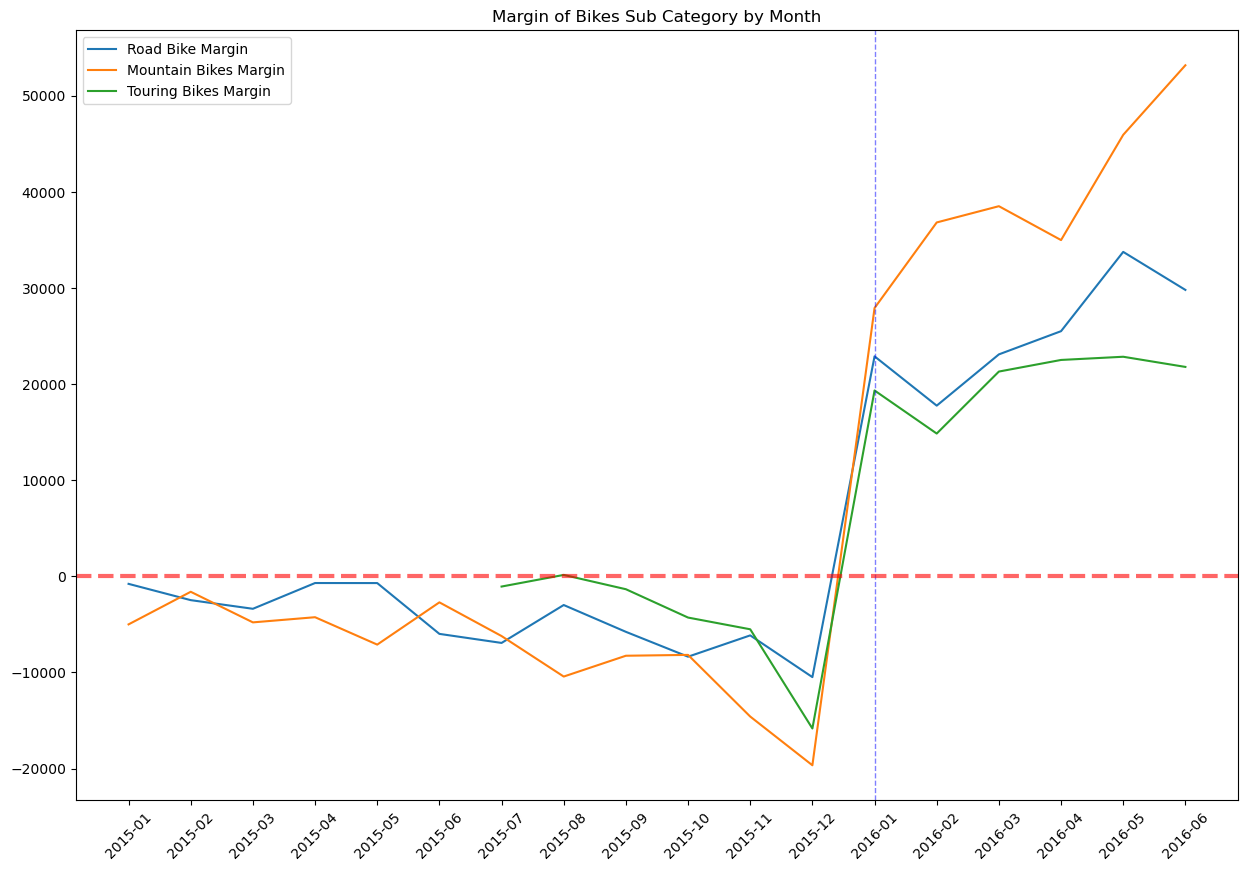

In [63]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes_m,label='Road Bike Margin')
plt.plot(Mountain_Bikes_m,label='Mountain Bikes Margin')
plt.plot(Touring_Bikes_m,label='Touring Bikes Margin')
plt.axvline(x=12,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=2)
plt.title('Margin of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6);
plt.show();

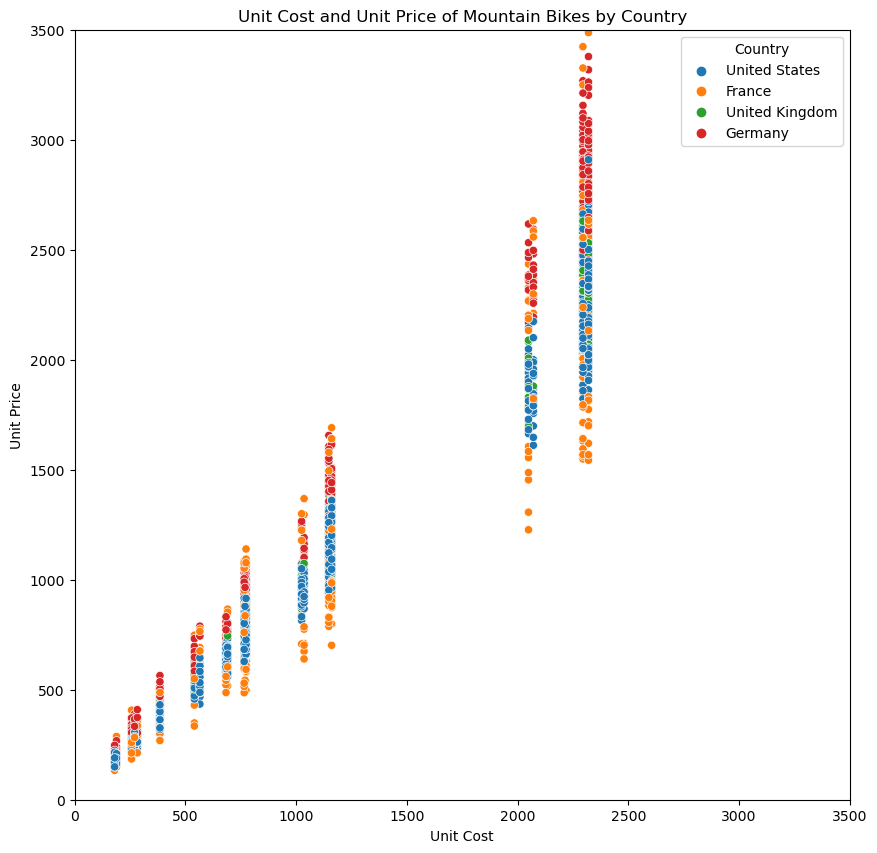

In [67]:
plt.figure(figsize=[10,10])
plt.xlim(0,3500)
plt.ylim(0,3500)
plt.title('Unit Cost and Unit Price of Mountain Bikes by Country')
sns.scatterplot(data=df_Mountain, x='Unit Cost',y='Unit Price',hue='Country');